# Pair Programming Asunciones Regresión Lineal

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import researchpy as rp
from scipy.stats import levene

from sklearn.impute import KNNImputer

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("datos/soci_econ_country_profiles_v2.csv", index_col=0)
df.head(2)

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Adjusted net national income per capita (constant 2010 US$),Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,119,91.8,1.0,2.3,13.7,4.8,38.9,256,85,99.0,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,333.23,0.30,52.57,34.05,44.06,50.37,58.40,9094.367252,112.887108,9.124315,0.611,NaN,76.372,74.4,110.3,103.4,102.9,63.5,96.2,98.3,24.9,15.4
1,Australia,Oceania,51352.2,2.7,76.1,111,111,89.4,1.5,1.9,3.9,9.4,28.7,948,222,100.0,176.54,101.94,57.58,74.25,80.66,9.24,34.73,24.58,72.79,70.87,1.41,80.66,62.39,76.87,77.12,101.94,43073.967170,115.686785,9.205948,0.803,1.948647,82.500,70.7,133.6,141.3,106.3,75.4,100.0,100.0,19.0,21.0


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.

## Homogeneidad de varianzas:

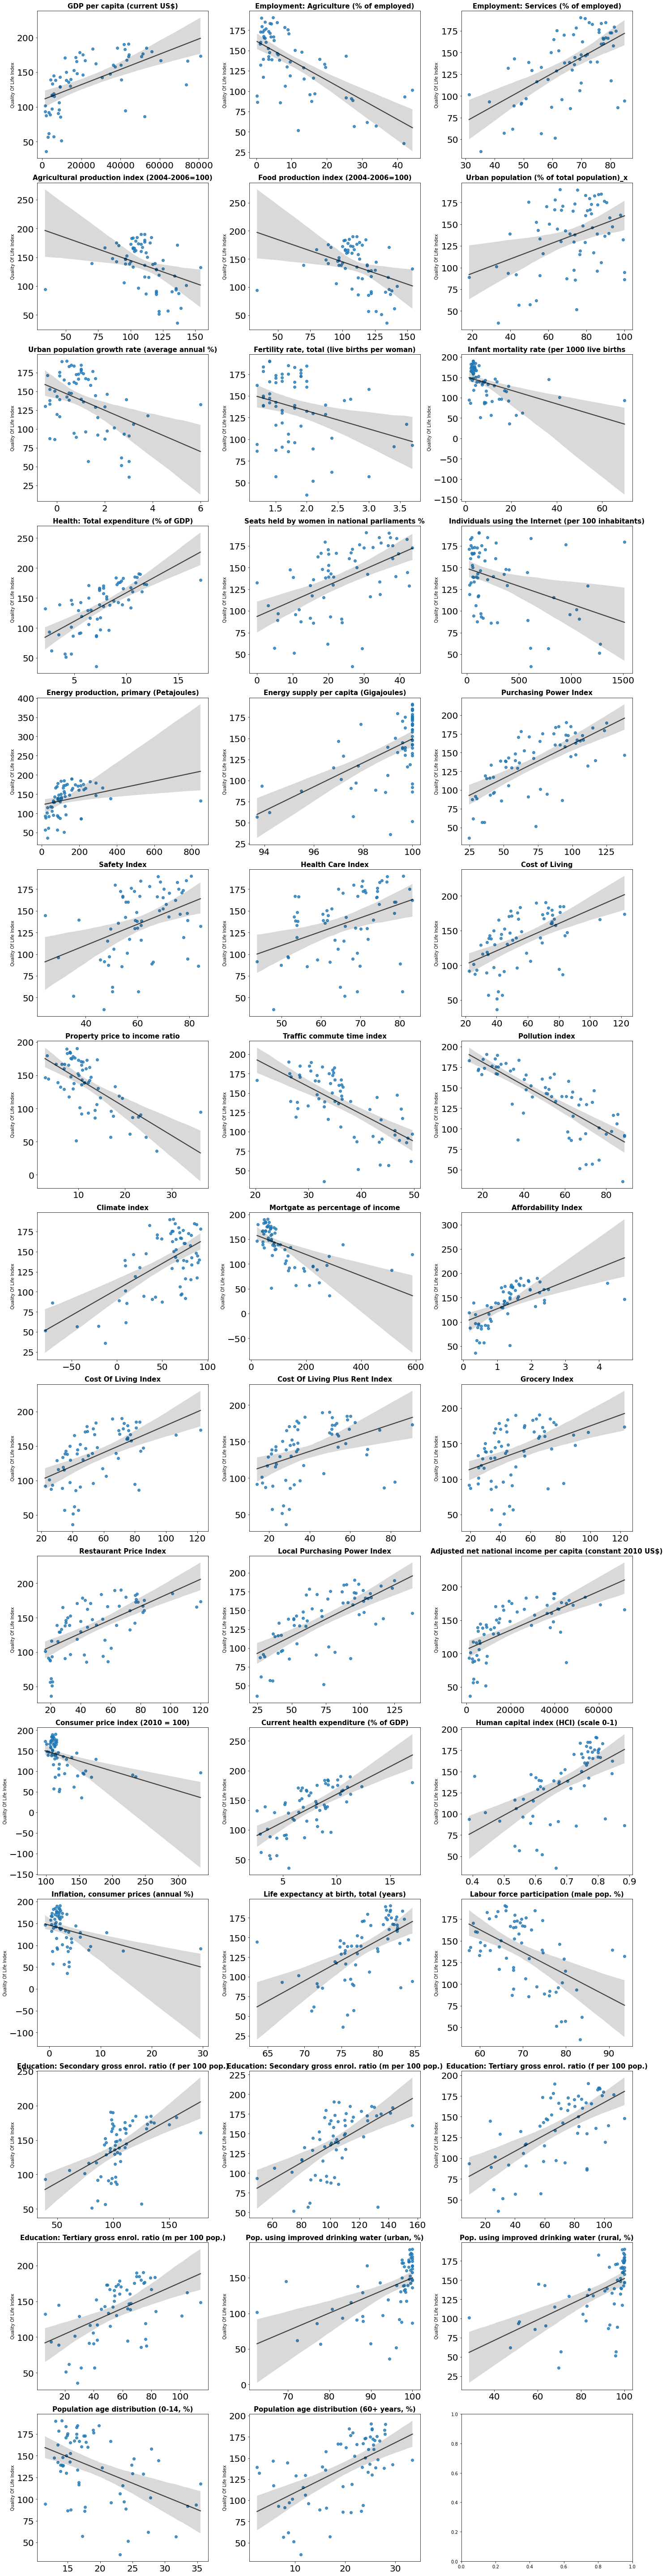

In [4]:
# creamos regplots de cada variable númerica con la variable respuesta

fig, axes = plt.subplots(nrows = 15, ncols = 3, figsize = (20, 80))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop('Quality Of Life Index', axis=1)
columnas_numeric = columnas_numeric.columns

for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'Quality Of Life Index',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

## Independencia de variables

In [5]:
columnas_numeric_lista = columnas_numeric.to_list()

In [6]:
# calculamos 

for col in df.columns:
    for i in columnas_numeric_lista:
        try:
            correlacion = df[col].corr(df[i])
            if correlacion > 0.7:
                print(f"La correlacion entre {col} y {i} es {correlacion}")
                print('-----------------------------')
        except:
            pass


La correlacion entre GDP per capita (current US$) y GDP per capita (current US$) es 1.0
-----------------------------
La correlacion entre GDP per capita (current US$) y Purchasing Power Index es 0.7864790091395256
-----------------------------
La correlacion entre GDP per capita (current US$) y Cost of Living es 0.9007663515482875
-----------------------------
La correlacion entre GDP per capita (current US$) y Cost Of Living Index es 0.9007663515482875
-----------------------------
La correlacion entre GDP per capita (current US$) y Cost Of Living Plus Rent Index es 0.91623963645121
-----------------------------
La correlacion entre GDP per capita (current US$) y Grocery Index es 0.8344445440842522
-----------------------------
La correlacion entre GDP per capita (current US$) y Restaurant Price Index es 0.8940023276845902
-----------------------------
La correlacion entre GDP per capita (current US$) y Local Purchasing Power Index es 0.7864790091395256
-----------------------------


In [7]:
# eliminamos columnas redundantes/dependientes

col_drop = ['Cost of Living', 'Cost Of Living Plus Rent Index', 'Adjusted net national income per capita (constant 2010 US$)', 
            'Food production index (2004-2006=100)', 'Local Purchasing Power Index', 'Grocery Index', 'Restaurant Price Index',
            'Mortgate as percentage of income']
df.drop(columns=col_drop, inplace=True)

In [8]:
df['Education: Secondary gross enrol. ratio (per 100 pop.)'] = (df['Education: Secondary gross enrol. ratio (f per 100 pop.)'] + df['Education: Secondary gross enrol. ratio (m per 100 pop.)']) / 2

In [9]:
df.head(2)

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),Education: Secondary gross enrol. ratio (f per 100 pop.),Education: Secondary gross enrol. ratio (m per 100 pop.),Education: Tertiary gross enrol. ratio (f per 100 pop.),Education: Tertiary gross enrol. ratio (m per 100 pop.),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,91.8,1.0,2.3,13.7,4.8,38.9,256,85,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,NaN,76.372,74.4,110.3,103.4,102.9,63.5,96.2,98.3,24.9,15.4,106.85
1,Australia,Oceania,51352.2,2.7,76.1,111,89.4,1.5,1.9,3.9,9.4,28.7,948,222,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500,70.7,133.6,141.3,106.3,75.4,100.0,100.0,19.0,21.0,137.45


In [10]:
df['Education: Tertiary gross enrol. ratio (per 100 pop.)'] = (df['Education: Tertiary gross enrol. ratio (f per 100 pop.)'] + df['Education: Tertiary gross enrol. ratio (m per 100 pop.)']) / 2

In [11]:
col_drop2 = ['Health: Total expenditure (% of GDP)', 'Education: Tertiary gross enrol. ratio (f per 100 pop.)', 
             'Education: Tertiary gross enrol. ratio (m per 100 pop.)', 'Education: Secondary gross enrol. ratio (m per 100 pop.)',
             'Education: Secondary gross enrol. ratio (f per 100 pop.)']
df.drop(columns=col_drop2, inplace=True)

In [12]:
df.shape

(65, 36)

In [13]:
columnas_nulos = []
columnas_nulos = [col for col in df.columns if df[col].isnull().sum() > 0 ]

In [14]:
columnas_nulos

['Seats held by women in national parliaments %',
 'Energy supply per capita (Gigajoules)',
 'Consumer price index (2010 = 100)',
 'Current health expenditure (% of GDP)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Pop. using improved drinking water (urban, %)',
 'Pop. using improved drinking water (rural, %)',
 'Education: Secondary gross enrol. ratio (per 100 pop.)',
 'Education: Tertiary gross enrol. ratio (per 100 pop.)']

In [15]:
for col in columnas_nulos:
    display(df[df[col].isnull()])

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
10,"China, Hong Kong SAR",EasternAsia,42431.0,0.2,84.9,34,100.0,0.7,1.2,1.6,NaN,64,83,NaN,94.45,81.45,79.32,67.99,36.15,42.22,69.9,29.73,0.44,79.96,127.768157,NaN,0.822,1.480583,84.680488,67.8,NaN,NaN,11.5,23.5,100.8,68.6


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
10,"China, Hong Kong SAR",EasternAsia,42431.0,0.2,84.9,34,100.0,0.7,1.2,1.6,NaN,64,83,NaN,94.45,81.45,79.32,67.99,36.15,42.22,69.9,29.73,0.44,79.96,127.768157,NaN,0.822,1.480583,84.680488,67.8,NaN,NaN,11.5,23.5,100.8,68.6


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
3,Belarus,EasternEurope,5750.8,9.6,58.4,122,76.7,0.0,1.6,3.6,34.5,25,122,99.9,119.23,36.43,77.74,53.76,18.73,27.66,39.64,20.07,0.17,33.84,NaN,5.925786,NaN,6.031837,74.129268,67.8,94.1,95.2,16.7,21.3,107.1,88.3


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
10,"China, Hong Kong SAR",EasternAsia,42431.0,0.2,84.9,34,100.0,0.7,1.2,1.6,NaN,64,83,NaN,94.45,81.45,79.32,67.99,36.15,42.22,69.9,29.73,0.44,79.96,127.768157,NaN,0.822,1.480583,84.680488,67.8,NaN,NaN,11.5,23.5,100.8,68.6


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
3,Belarus,EasternEurope,5750.8,9.6,58.4,122,76.7,0.0,1.6,3.6,34.5,25,122,99.9,119.23,36.43,77.74,53.76,18.73,27.66,39.64,20.07,0.17,33.84,NaN,5.925786,NaN,6.031837,74.129268,67.8,94.1,95.2,16.7,21.3,107.1,88.3


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119,91.8,1.0,2.3,13.7,38.9,256,85,99.0,139.59,58.4,37.37,73.3,12.07,37.95,53.33,90.67,0.3,52.57,112.887108,9.124315,0.611,NaN,76.372,74.4,96.2,98.3,24.9,15.4,106.85,83.2


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
10,"China, Hong Kong SAR",EasternAsia,42431.0,0.2,84.9,34,100.0,0.7,1.2,1.6,NaN,64,83,NaN,94.45,81.45,79.32,67.99,36.15,42.22,69.90,29.73,0.44,79.96,127.768157,NaN,0.822,1.480583,84.680488,67.8,NaN,NaN,11.5,23.5,100.80,68.60
37,New Zealand,Oceania,38294.3,5.9,72.6,116,86.3,1.0,2.0,4.4,34.2,199,207,100.0,184.74,89.87,61.22,70.58,8.14,30.23,20.03,85.41,1.56,80.77,110.651579,9.170055,0.767,1.850788,81.658537,72.8,NaN,NaN,19.8,20.8,116.65,84.15


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
10,"China, Hong Kong SAR",EasternAsia,42431.0,0.2,84.9,34,100.0,0.7,1.2,1.6,NaN,64,83,NaN,94.45,81.45,79.32,67.99,36.15,42.22,69.90,29.73,0.44,79.96,127.768157,NaN,0.822,1.480583,84.680488,67.8,NaN,NaN,11.5,23.5,100.80,68.60
37,New Zealand,Oceania,38294.3,5.9,72.6,116,86.3,1.0,2.0,4.4,34.2,199,207,100.0,184.74,89.87,61.22,70.58,8.14,30.23,20.03,85.41,1.56,80.77,110.651579,9.170055,0.767,1.850788,81.658537,72.8,NaN,NaN,19.8,20.8,116.65,84.15
49,Singapore,South-easternAsia,52239.0,0.3,82.6,112,100.0,2.0,1.2,2.1,23.8,293,209,100.0,86.50,92.70,83.42,69.87,21.63,43.39,37.04,-71.47,0.74,82.41,113.265923,4.440383,0.884,0.576260,83.095122,76.1,100.0,NaN,15.0,19.5,NaN,NaN


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
5,Bosnia and Herzegovina,SouthernEurope,4265.0,18.0,51.7,96,39.8,0.1,1.3,7.6,21.4,91,85,99.7,139.14,51.29,59.03,61.49,11.35,26.63,60.69,73.29,0.95,35.05,102.851586,8.931667,0.618,0.810133,77.128000,57.5,98.9,92.0,14.1,23.4,NaN,NaN
49,Singapore,South-easternAsia,52239.0,0.3,82.6,112,100.0,2.0,1.2,2.1,23.8,293,209,100.0,86.50,92.70,83.42,69.87,21.63,43.39,37.04,-71.47,0.74,82.41,113.265923,4.440383,0.884,0.576260,83.095122,76.1,100.0,NaN,15.0,19.5,NaN,NaN
61,United Arab Emirates,WesternAsia,40438.8,3.5,75.4,70,85.5,2.9,1.8,6.2,20.0,56,366,99.6,139.27,116.77,79.34,60.49,5.60,35.05,58.52,8.86,2.38,67.98,113.302921,3.334282,0.659,1.966826,77.647000,90.8,98.0,95.2,13.9,2.4,NaN,NaN
65,Vietnam,South-easternAsia,2067.9,41.8,35.2,136,33.6,3.0,2.0,19.3,26.7,616,30,99.1,36.12,24.77,47.04,47.87,26.76,33.00,88.10,-12.87,0.35,40.11,153.631652,5.532128,0.666,3.520257,75.241000,83.3,94.4,69.7,23.1,11.1,NaN,28.85


,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
5,Bosnia and Herzegovina,SouthernEurope,4265.0,18.0,51.7,96,39.8,0.1,1.3,7.6,21.4,91,85,99.7,139.14,51.29,59.03,61.49,11.35,26.63,60.69,73.29,0.95,35.05,102.851586,8.931667,0.618,0.810133,77.128000,57.5,98.9,92.0,14.1,23.4,NaN,NaN
8,Canada,NorthernAmerica,43205.6,2.1,78.4,109,81.8,1.2,1.6,4.7,26.3,122,324,100.0,167.18,108.01,60.75,69.23,6.40,36.24,26.54,44.31,2.37,70.16,111.984831,10.572769,0.799,1.596884,81.948780,69.9,100.0,99.0,16.0,23.5,109.9,NaN
49,Singapore,South-easternAsia,52239.0,0.3,82.6,112,100.0,2.0,1.2,2.1,23.8,293,209,100.0,86.50,92.70,83.42,69.87,21.63,43.39,37.04,-71.47,0.74,82.41,113.265923,4.440383,0.884,0.576260,83.095122,76.1,100.0,NaN,15.0,19.5,NaN,NaN
61,United Arab Emirates,WesternAsia,40438.8,3.5,75.4,70,85.5,2.9,1.8,6.2,20.0,56,366,99.6,139.27,116.77,79.34,60.49,5.60,35.05,58.52,8.86,2.38,67.98,113.302921,3.334282,0.659,1.966826,77.647000,90.8,98.0,95.2,13.9,2.4,NaN,NaN


In [16]:
#eliminamos China, Hong Kong SAR por su cantidad de valores nulos
df.drop(index=10, axis=0, inplace=True)

In [17]:
columnas_nulos2 = []
columnas_nulos2 = [col for col in df.columns if df[col].isnull().sum() > 0 ]
columnas_nulos2

['Consumer price index (2010 = 100)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Pop. using improved drinking water (urban, %)',
 'Pop. using improved drinking water (rural, %)',
 'Education: Secondary gross enrol. ratio (per 100 pop.)',
 'Education: Tertiary gross enrol. ratio (per 100 pop.)']

In [18]:
columnas_numeric2 = df.select_dtypes(include = np.number).drop('Quality Of Life Index', axis=1)
columnas_numeric2_lista = columnas_numeric2.columns.to_list()

In [19]:
resultados = {}

#iteremos por la lista de las columnas numéricas
for col in columnas_numeric2_lista:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df["Quality Of Life Index"], center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [20]:
resultados

{'GDP per capita (current US$)': 1.0666573333757215e-14,
 'Employment: Agriculture (% of employed)': 4.0037610636071455e-11,
 'Employment: Services (% of employed)': 9.267037282006087e-10,
 'Agricultural production index (2004-2006=100)': 8.108691658301958e-08,
 'Urban population (% of total population)_x': 8.050653869260399e-07,
 'Urban population growth rate (average annual %)': 8.847720320979095e-18,
 'Fertility rate, total (live births per woman)': 3.3396268467388024e-18,
 'Infant mortality rate (per 1000 live births': 4.016809987441446e-12,
 'Seats held by women in national parliaments %': 1.0332966117074003e-10,
 'Individuals using the Internet (per 100 inhabitants)': 1.696247361353417e-06,
 'Energy production, primary (Petajoules)': 0.003569543281695471,
 'Energy supply per capita (Gigajoules)': 9.608969167007602e-18,
 'Purchasing Power Index': 0.10206538730869077,
 'Safety Index': 1.151588665142363e-09,
 'Health Care Index': 9.451603105658978e-12,
 'Property price to income rat

In [21]:
for col in df.columns:
    print(col)
    print(df[col].isnull().sum())

country
0
Region
0
GDP per capita (current US$)
0
Employment: Agriculture (% of employed)
0
Employment: Services (% of employed)
0
Agricultural production index (2004-2006=100)
0
Urban population (% of total population)_x
0
Urban population growth rate (average annual %)
0
Fertility rate, total (live births per woman)
0
Infant mortality rate (per 1000 live births
0
Seats held by women in national parliaments %
0
Individuals using the Internet (per 100 inhabitants)
0
Energy production, primary (Petajoules)
0
Energy supply per capita (Gigajoules)
0
Quality Of Life Index
0
Purchasing Power Index
0
Safety Index
0
Health Care Index
0
Property price to income ratio
0
Traffic commute time index
0
Pollution index
0
Climate index
0
Affordability Index
0
Cost Of Living Index
0
Consumer price index (2010 = 100)
1
Current health expenditure (% of GDP)
0
Human capital index (HCI) (scale 0-1)
1
Inflation, consumer prices (annual %)
1
Life expectancy at birth, total (years)
0
Labour force participati

In [22]:
df_numeric = df.select_dtypes(include = np.number)

In [23]:
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_numeric)
numericas_knn = imputer.transform(df_numeric)
df_datos_KNN = pd.DataFrame(numericas_knn, columns=df_numeric.columns)
df_datos_KNN.head(2)

,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,14564.5,2.0,73.1,119.0,91.8,1.0,2.3,13.7,38.9,256.0,85.0,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,2.328346,76.372,74.4,96.2,98.3,24.9,15.4,106.85,83.20
1,51352.2,2.7,76.1,111.0,89.4,1.5,1.9,3.9,28.7,948.0,222.0,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500,70.7,100.0,100.0,19.0,21.0,137.45,90.85


In [24]:
columnas_knn = df_datos_KNN.columns
df.drop(columnas_knn, axis = 1, inplace = True)

In [25]:
df[columnas_knn] = numericas_knn
df.head(2)

,country,Region,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Agricultural production index (2004-2006=100),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Seats held by women in national parliaments %,Individuals using the Internet (per 100 inhabitants),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Affordability Index,Cost Of Living Index,Consumer price index (2010 = 100),Current health expenditure (% of GDP),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Labour force participation (male pop. %),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Population age distribution (0-14, %)","Population age distribution (60+ years, %)",Education: Secondary gross enrol. ratio (per 100 pop.),Education: Tertiary gross enrol. ratio (per 100 pop.)
0,Argentina,SouthAmerica,14564.5,2.0,73.1,119.0,91.8,1.0,2.3,13.7,38.9,256.0,85.0,99.0,139.59,58.40,37.37,73.30,12.07,37.95,53.33,90.67,0.30,52.57,112.887108,9.124315,0.611,2.328346,76.372,74.4,96.2,98.3,24.9,15.4,106.85,83.20
1,Australia,Oceania,51352.2,2.7,76.1,111.0,89.4,1.5,1.9,3.9,28.7,948.0,222.0,100.0,176.54,101.94,57.58,74.25,9.24,34.73,24.58,72.79,1.41,80.66,115.686785,9.205948,0.803,1.948647,82.500,70.7,100.0,100.0,19.0,21.0,137.45,90.85


In [26]:
for col in df.columns:
    print(col)
    print(df[col].isnull().sum())

country
0
Region
0
GDP per capita (current US$)
0
Employment: Agriculture (% of employed)
0
Employment: Services (% of employed)
0
Agricultural production index (2004-2006=100)
0
Urban population (% of total population)_x
0
Urban population growth rate (average annual %)
0
Fertility rate, total (live births per woman)
0
Infant mortality rate (per 1000 live births
0
Seats held by women in national parliaments %
0
Individuals using the Internet (per 100 inhabitants)
0
Energy production, primary (Petajoules)
0
Energy supply per capita (Gigajoules)
0
Quality Of Life Index
0
Purchasing Power Index
0
Safety Index
0
Health Care Index
0
Property price to income ratio
0
Traffic commute time index
0
Pollution index
0
Climate index
0
Affordability Index
0
Cost Of Living Index
0
Consumer price index (2010 = 100)
0
Current health expenditure (% of GDP)
0
Human capital index (HCI) (scale 0-1)
0
Inflation, consumer prices (annual %)
0
Life expectancy at birth, total (years)
0
Labour force participati

In [27]:
df.to_csv('datos/soci_econ_country_profiles_v3.csv')